# **Business Case Study: Audiobook app**
You are given data from an Audiobook app. Logically, it relates only to the audio versions of books. We want to create a machine learning model based on our available data that can predict if a customer will buy again from the Audiobook company.
    
 The data is from an audiobook app, each customer in the database has make a purchase at least once.
  
 The main idea is that the company shouldn't spend there money targeting individuals who are unlikely to come back.
 
If we focus on client who are more likely to convert again we'll get increase the sales and profitability figures.

The model must show us which are the most important metrics for a client to come back.

## **0. IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [2]:
raw_data = pd.read_csv('audiobook_data_2.csv')
raw_data

,ID,Book_length(mins)_overall,Book_length(mins)_avg,Price_overall,Price_avg,Review,Review10/10,Completion,Minutes_listened,Support_Request,Last_Visited_mins_Purchase_date,Target
0,994,1620.0,1620,19.73,19.73,1,10.00,0.99,1603.8,5,92,0
1,1143,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,0,0
2,2059,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,388,0
3,2882,1620.0,1620,5.96,5.96,0,8.91,0.42,680.4,1,129,0
4,3342,2160.0,2160,5.33,5.33,0,8.91,0.22,475.2,0,361,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14079,28220,1620.0,1620,5.33,5.33,1,9.00,0.61,988.2,0,4,0
14080,28671,1080.0,1080,6.55,6.55,1,6.00,0.29,313.2,0,29,0
14081,31134,2160.0,2160,6.14,6.14,0,8.91,0.00,0.0,0,0,0
14082,32832,1620.0,1620,5.33,5.33,1,8.00,0.38,615.6,0,90,0


In [3]:
data = raw_data.copy()
data.head(10)

,ID,Book_length(mins)_overall,Book_length(mins)_avg,Price_overall,Price_avg,Review,Review10/10,Completion,Minutes_listened,Support_Request,Last_Visited_mins_Purchase_date,Target
0,994,1620.0,1620,19.73,19.73,1,10.00,0.99,1603.8,5,92,0
1,1143,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,0,0
2,2059,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,388,0
3,2882,1620.0,1620,5.96,5.96,0,8.91,0.42,680.4,1,129,0
4,3342,2160.0,2160,5.33,5.33,0,8.91,0.22,475.2,0,361,0
5,3416,2160.0,2160,4.61,4.61,0,8.91,0.00,0.0,0,0,0
6,4949,2160.0,2160,5.33,5.33,0,8.91,0.04,86.4,0,366,0
7,9011,648.0,648,5.33,5.33,0,8.91,0.00,0.0,0,0,1
8,9282,2160.0,2160,5.33,5.33,0,8.91,0.26,561.6,0,33,0
9,10500,2160.0,2160,5.33,5.33,1,10.00,0.27,583.2,0,366,0


## **1. Getting aquainted with the dataset**

- <code><strong>ID :</strong></code> It is the customerID.It is like a name


- <code><strong>Book_length(mins)_overall :</strong></code> It is the sum of the lengths of purchases.


- <code><strong>Book_length(mins)_avg :</strong></code> It is the sum of the lengths of purchases divided by the number of purchases. 
- We don't need to mention **the number of purchases** column because we can get it from <code><b>Book_length(mins)_overall / Book_length(mins)_avg</b></code>


- <code><strong>Price_overall & Price_avg :</strong></code> Same as Book length, the price variable is almost always a **good predictor of behaviour**


- <code><strong>Review :</strong></code> is boolean. It shows if the customer left a review. 
    - This metric shows **engagement with the platform**.People who leave reviews are most likely to convert again
    
    
- <code><b>Review10/10 :</b></code> saves the review left by the user. While most users don't left a review **we fill the missing reviews by average review column**.
     - The average review is **8.91**
     - Review < **8.91**, means the customer has below average feelings
     - Review > **8.91**, means the customer has above average feelings
     - If a customer has an average of **2/10** , it indicates the person did not have a pleasant experience with the audiobooks when the average is **8.91**.It is logical that such a customer is not likely to buy again

- <code><strong>Minutes_listened :</strong></code> is a **measure of engagement**, the total of minutes the user listen to audiobooks.


- <code><strong>Completion :</strong></code> is the <code><b>Minutes_listened / Book_length(mins)_overall</b></code>.


- <code><strong>Support_Request :</strong></code> Shows the total number of support request (forgotten password to assistance)
    - It is a **measure of engagement**
    - It may turn out that the more support a person needed,the more he or she got fed up with the platform and abandoned it
    

- <code><strong>Last_Visited_mins_Purchase_date :</strong></code> the bigger the difference, the bigger sooner the engagement. If the value is 0, we are sure the customer has never accessed what he/she has bought.



<b>The data was gathered from the audiobook app, the input data represents 2 years worth of engagement. We are doing supervised learning so we need target. We took extra 6 month to check if the user converted or not. 1 if the customer buys in the next 6 months, 0 if the customer didn't.</b>



<code><strong>target :</strong></code> 1 if the customer bought again in the last 6 months of data. 0 if the customer did not buy again.

## **2. Exploratory Data Analysis**

In [4]:
data.describe()

,ID,Book_length(mins)_overall,Book_length(mins)_avg,Price_overall,Price_avg,Review,Review10/10,Completion,Minutes_listened,Support_Request,Last_Visited_mins_Purchase_date,Target
count,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000
mean,16772.491551,1591.281685,1678.608634,7.103791,7.543805,0.160750,8.909795,0.125659,189.888983,0.070222,61.935033,0.158833
std,9691.807248,504.340663,654.838599,4.931673,5.560129,0.367313,0.643406,0.241206,371.084010,0.472157,88.207634,0.365533
min,2.000000,216.000000,216.000000,3.860000,3.860000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8368.000000,1188.000000,1188.000000,5.330000,5.330000,0.000000,8.910000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16711.500000,1620.000000,1620.000000,5.950000,6.070000,0.000000,8.910000,0.000000,0.000000,0.000000,11.000000,0.000000
75%,25187.250000,2160.000000,2160.000000,8.000000,8.000000,0.000000,8.910000,0.130000,194.400000,0.000000,105.000000,0.000000
max,33683.000000,2160.000000,7020.000000,130.940000,130.940000,1.000000,10.000000,1.000000,2160.000000,30.000000,464.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14084 entries, 0 to 14083
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               14084 non-null  int64  
 1   Book_length(mins)_overall        14084 non-null  float64
 2   Book_length(mins)_avg            14084 non-null  int64  
 3   Price_overall                    14084 non-null  float64
 4   Price_avg                        14084 non-null  float64
 5   Review                           14084 non-null  int64  
 6   Review10/10                      14084 non-null  float64
 7   Completion                       14084 non-null  float64
 8   Minutes_listened                 14084 non-null  float64
 9   Support_Request                  14084 non-null  int64  
 10  Last_Visited_mins_Purchase_date  14084 non-null  int64  
 11  Target                           14084 non-null  int64  
dtypes: float64(6), int

In [6]:
data.isnull().sum()

ID                                 0
Book_length(mins)_overall          0
Book_length(mins)_avg              0
Price_overall                      0
Price_avg                          0
Review                             0
Review10/10                        0
Completion                         0
Minutes_listened                   0
Support_Request                    0
Last_Visited_mins_Purchase_date    0
Target                             0
dtype: int64

## <code>**Book_length(mins)_overall & Book_length(mins)_avg**</code>

In [7]:
data['Book_length(mins)_overall'].value_counts()

2160.000000    4712
1620.000000    4149
1188.000000    2851
648.000000      712
1080.000000     567
324.000000      300
540.000000      115
1404.000000     112
1890.000000     110
1674.000000      98
1134.000000      52
216.000000       51
1656.000000      27
1476.000000      23
1350.000000      21
756.000000       21
918.000000       15
1332.000000      14
1242.000000      13
864.000000       13
1296.000000      10
1152.000000       8
1116.000000       7
972.000000        7
486.000000        6
1377.000000       5
1368.000000       5
1512.000000       5
1224.000000       5
1044.000000       4
432.000000        4
594.000000        4
1008.000000       3
702.000000        3
684.000000        3
504.000000        2
576.000000        2
1161.000000       2
1269.000000       2
928.800000        1
1252.800000       1
1440.000000       1
1339.200000       1
990.000000        1
378.000000        1
945.000000        1
828.000000        1
1431.000000       1
720.000000        1
612.000000        1


In [8]:
def book_length(length):
    if length > 1200:
        return 1
    else:
        return 0
    
data['purchases_hour_>3h'] = data['Book_length(mins)_overall'].apply(book_length)

In [9]:
data['Book_length(mins)_avg'].apply(book_length).value_counts()

1    9480
0    4604
Name: Book_length(mins)_avg, dtype: int64

In [10]:
data['purchases_hour_>3h'].value_counts()

1    9317
0    4767
Name: purchases_hour_>3h, dtype: int64

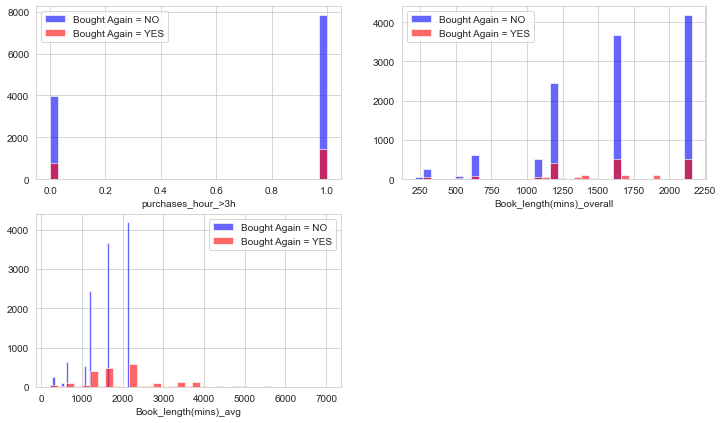

In [11]:
columns = ['purchases_hour_>3h', 'Book_length(mins)_overall', 'Book_length(mins)_avg']
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## <code>**Price_overall & Price_avg**</code

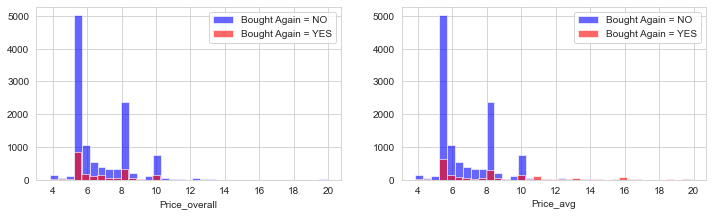

In [12]:
columns = ["Price_overall", "Price_avg"]
plt.figure(figsize=(12, 7))
df = data[(data.Price_overall < 20) & (data.Price_avg < 20)]

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    df[df["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    df[df["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## <code>**Review & Review10/10**</code>


In [13]:
print(data[data['Review'] == 0].Target.value_counts(normalize=True))
print(data[data['Review'] == 1].Target.value_counts(normalize=True))

0    0.843063
1    0.156937
Name: Target, dtype: float64
0    0.831272
1    0.168728
Name: Target, dtype: float64


In [14]:
data['Review10/10'].value_counts()

8.91     11616
10.00     1284
8.00       404
9.00       381
7.00       157
6.00       104
5.00        43
9.50        21
4.00        18
8.50        11
1.00        10
3.00         9
2.00         7
6.50         5
8.67         2
7.50         2
5.50         2
8.33         2
4.50         1
9.67         1
9.40         1
1.50         1
6.67         1
7.75         1
Name: Review10/10, dtype: int64

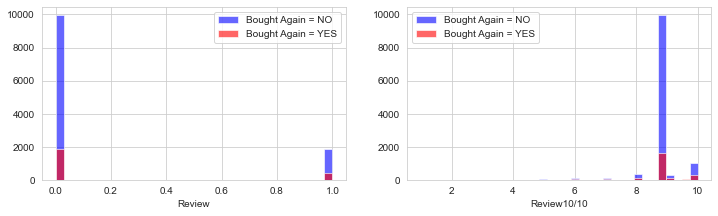

In [15]:
columns = ["Review", "Review10/10"]
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## <code>**Minutes_listened & Completion**</code>


In [16]:
def listened_to_books(minutes):
    if minutes > 0.0:
        return 0
    else:
        return 1
data['listened_to_books'] = data.Minutes_listened.apply(listened_to_books)

In [17]:
def completion_state(minutes):
    if minutes > 0.5:
        return 1
    else:
        return 0
data['completion_state'] = data.Completion.apply(completion_state)

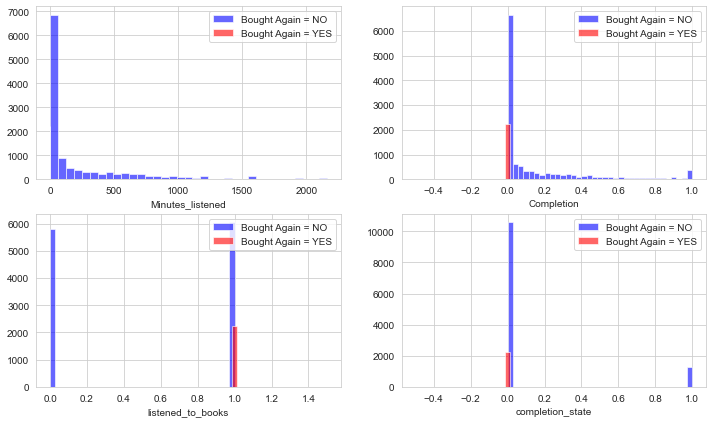

In [18]:
columns = ["Minutes_listened", "Completion", "listened_to_books", "completion_state"]
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [19]:
data.drop('Minutes_listened', axis=1, inplace=True)

## <code>**Support_Request & Last_Visited_mins_Purchase_date**</code>

In [20]:
def asked_for_request(request):
    if request == 0:
        return 0
    else:
        return 1
    
data["asked_for_request"] = data.Support_Request.apply(asked_for_request)

In [21]:
def acc_purchases(purchase):
    if purchase == 0:
        return 0
    else:
        return 1
data['acc_purchases'] = data.Last_Visited_mins_Purchase_date.apply(acc_purchases)

In [22]:
data.Last_Visited_mins_Purchase_date.value_counts()

0      5493
1       357
2       198
3       165
5       140
       ... 
369       1
367       1
339       1
379       1
363       1
Name: Last_Visited_mins_Purchase_date, Length: 371, dtype: int64

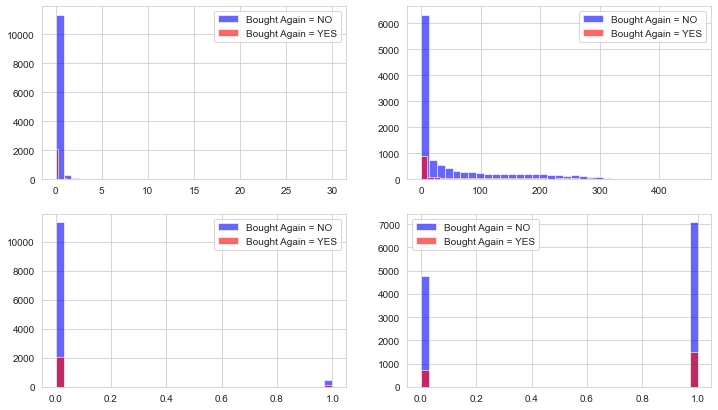

In [23]:
columns = ["Support_Request", "Last_Visited_mins_Purchase_date", "asked_for_request", "acc_purchases"]
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()

In [24]:
data.drop('Support_Request', axis=1, inplace=True)

In [25]:
print(f"{data.Target.value_counts()}")
print(f"{data.Target.value_counts()[0] / data.Target.value_counts()[1]}")

0    11847
1     2237
Name: Target, dtype: int64
5.295932051855163


**It is important to notice that our target variable is inbabalanced. We have only 2237 user who convert again in the 6 month period. The data need to be balanced**.

<AxesSubplot:>

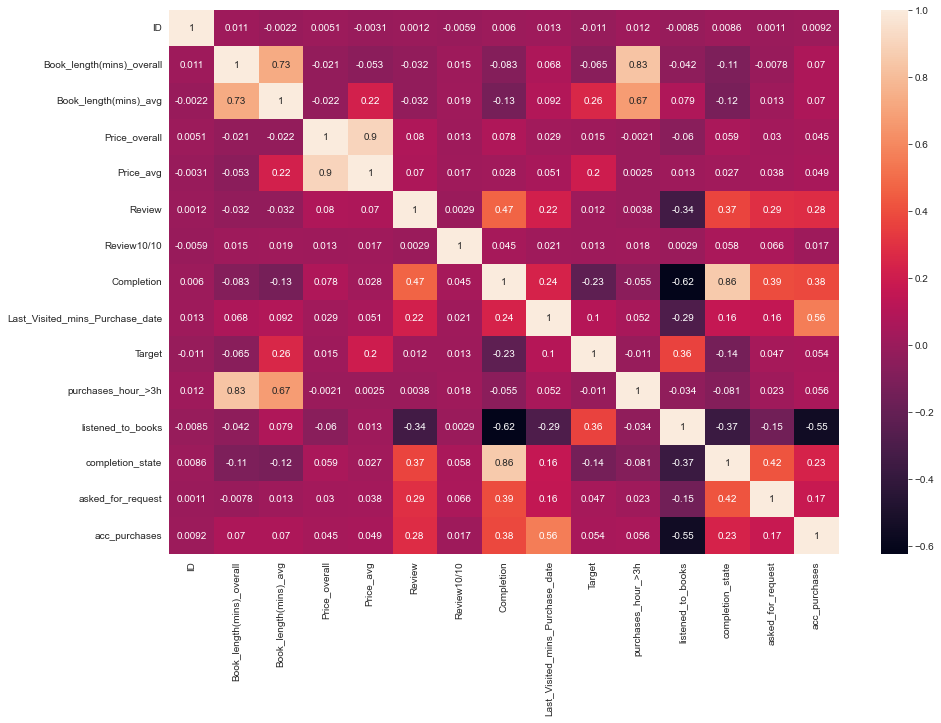

In [26]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)

In [27]:
data

,ID,Book_length(mins)_overall,Book_length(mins)_avg,Price_overall,Price_avg,Review,Review10/10,Completion,Last_Visited_mins_Purchase_date,Target,purchases_hour_>3h,listened_to_books,completion_state,asked_for_request,acc_purchases
0,994,1620.0,1620,19.73,19.73,1,10.00,0.99,92,0,1,0,1,1,1
1,1143,2160.0,2160,5.33,5.33,0,8.91,0.00,0,0,1,1,0,0,0
2,2059,2160.0,2160,5.33,5.33,0,8.91,0.00,388,0,1,1,0,0,1
3,2882,1620.0,1620,5.96,5.96,0,8.91,0.42,129,0,1,0,0,1,1
4,3342,2160.0,2160,5.33,5.33,0,8.91,0.22,361,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14079,28220,1620.0,1620,5.33,5.33,1,9.00,0.61,4,0,1,0,1,0,1
14080,28671,1080.0,1080,6.55,6.55,1,6.00,0.29,29,0,0,0,0,0,1
14081,31134,2160.0,2160,6.14,6.14,0,8.91,0.00,0,0,1,1,0,0,0
14082,32832,1620.0,1620,5.33,5.33,1,8.00,0.38,90,0,1,0,0,0,1


## **3.PRE PROCESSING**

In [28]:
import tensorflow as tf
# We will use the sklearn preprocessing library, as it will be easier to standardize the data.
from sklearn import preprocessing

In [29]:
raw_data

,ID,Book_length(mins)_overall,Book_length(mins)_avg,Price_overall,Price_avg,Review,Review10/10,Completion,Minutes_listened,Support_Request,Last_Visited_mins_Purchase_date,Target
0,994,1620.0,1620,19.73,19.73,1,10.00,0.99,1603.8,5,92,0
1,1143,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,0,0
2,2059,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,388,0
3,2882,1620.0,1620,5.96,5.96,0,8.91,0.42,680.4,1,129,0
4,3342,2160.0,2160,5.33,5.33,0,8.91,0.22,475.2,0,361,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14079,28220,1620.0,1620,5.33,5.33,1,9.00,0.61,988.2,0,4,0
14080,28671,1080.0,1080,6.55,6.55,1,6.00,0.29,313.2,0,29,0
14081,31134,2160.0,2160,6.14,6.14,0,8.91,0.00,0.0,0,0,0
14082,32832,1620.0,1620,5.33,5.33,1,8.00,0.38,615.6,0,90,0


In [30]:
# The inputs are all columns in the csv, except for the first one [:,0]
# (which is just the arbitrary customer IDs that bear no useful information),
# and the last one [:,-1] (which is our targets)

unscaled_inputs_all = raw_data.iloc[:,1:-1]

# The targets are in the last column. That's how datasets are conventionally organized.
targets_all = raw_data.iloc[:,-1]

In [31]:
print(type(unscaled_inputs_all))
unscaled_inputs_all.head()

<class 'pandas.core.frame.DataFrame'>


,Book_length(mins)_overall,Book_length(mins)_avg,Price_overall,Price_avg,Review,Review10/10,Completion,Minutes_listened,Support_Request,Last_Visited_mins_Purchase_date
0,1620.0,1620,19.73,19.73,1,10.00,0.99,1603.8,5,92
1,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,0
2,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,388
3,1620.0,1620,5.96,5.96,0,8.91,0.42,680.4,1,129
4,2160.0,2160,5.33,5.33,0,8.91,0.22,475.2,0,361


In [32]:
print(type(targets_all))
targets_all.head()

<class 'pandas.core.series.Series'>


0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [33]:
unscaled_inputs_all = unscaled_inputs_all.to_numpy()
targets_all = targets_all.to_numpy()

In [34]:
print(type(unscaled_inputs_all))
print(type(targets_all))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Balance the dataset

In [35]:
# Count how many targets are 1 (meaning that the customer did convert)
num_one_targets = int(np.sum(targets_all))

# Set a counter for targets that are 0 (meaning that the customer did not convert)
zero_targets_counter = 0

# We want to create a "balanced" dataset, so we will have to remove some input/target pairs.
# Declare a variable that will do that:
indices_to_remove = []

# Count the number of targets that are 0. 
# Once there are as many 0s as 1s, mark entries where the target is 0.
for i in range(targets_all.shape[0]):
    if targets_all[i] == 0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)

# Create two new variables, one that will contain the inputs, and one that will contain the targets.
# We delete all indices that we marked "to remove" in the loop above.
unscaled_inputs_equal_priors = np.delete(unscaled_inputs_all, indices_to_remove, axis=0)
targets_equal_priors = np.delete(targets_all, indices_to_remove, axis=0)

### Standardize the inputs

In [36]:
# That's the only place we use sklearn functionality. We will take advantage of its preprocessing capabilities
# It's a simple line of code, which standardizes the inputs, as we explained in one of the lectures.
# At the end of the business case, you can try to run the algorithm WITHOUT this line of code. 
# The result will be interesting.
scaled_inputs = preprocessing.scale(unscaled_inputs_equal_priors)

### Shuffle the data

In [37]:
# When the data was collected it was actually arranged by date
# Shuffle the indices of the data, so the data is not arranged in any way when we feed it.
# Since we will be batching, we want the data to be as randomly spread out as possible
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

# Use the shuffled indices to shuffle the inputs and targets.
shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_equal_priors[shuffled_indices]

### Split the dataset into train, validation, and test

In [38]:
# Count the total number of samples
samples_count = shuffled_inputs.shape[0]

# Count the samples in each subset, assuming we want 80-10-10 distribution of training, validation, and test.
# Naturally, the numbers are integers.
train_samples_count = int(0.8 * samples_count)
validation_samples_count = int(0.1 * samples_count)

# The 'test' dataset contains all remaining data.
test_samples_count = samples_count - train_samples_count - validation_samples_count

# Create variables that record the inputs and targets for training
# In our shuffled dataset, they are the first "train_samples_count" observations
train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

# Create variables that record the inputs and targets for validation.
# They are the next "validation_samples_count" observations, folllowing the "train_samples_count" we already assigned
validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

# Create variables that record the inputs and targets for test.
# They are everything that is remaining.
test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

# We balanced our dataset to be 50-50 (for targets 0 and 1), but the training, validation, and test were 
# taken from a shuffled dataset. Check if they are balanced, too. Note that each time you rerun this code, 
# you will get different values, as each time they are shuffled randomly.
# Normally you preprocess ONCE, so you need not rerun this code once it is done.
# If you rerun this whole sheet, the npzs will be overwritten with your newly preprocessed data.

# Print the number of targets that are 1s, the total number of samples, and the proportion for training, validation, and test.
print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)

1785 3579 0.49874266554903607
227 447 0.5078299776286354
225 448 0.5022321428571429


### Save the three datasets in *.npz

In [39]:
# Save the three datasets in *.npz.
# In the next lesson, you will see that it is extremely valuable to name them in such a coherent way!

np.savez('Audiobooks_data_train', inputs=train_inputs, targets=train_targets)
np.savez('Audiobooks_data_validation', inputs=validation_inputs, targets=validation_targets)
np.savez('Audiobooks_data_test', inputs=test_inputs, targets=test_targets)

## **4.Create the machine learning algorithm**

### Data

In [40]:
# let's create a temporary variable npz, where we will store each of the three Audiobooks datasets
npz = np.load('Audiobooks_data_train.npz')

# we extract the inputs using the keyword under which we saved them
# to ensure that they are all floats, let's also take care of that
train_inputs = npz['inputs'].astype(np.float)
# targets must be int because of sparse_categorical_crossentropy (we want to be able to smoothly one-hot encode them)
train_targets = npz['targets'].astype(np.int)

# we load the validation data in the temporary variable
npz = np.load('Audiobooks_data_validation.npz')
# we can load the inputs and the targets in the same line
validation_inputs, validation_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

# we load the test data in the temporary variable
npz = np.load('Audiobooks_data_test.npz')
# we create 2 variables that will contain the test inputs and the test targets
test_inputs, test_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

<ipython-input-40-447d6e979645>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_inputs = npz['inputs'].astype(np.float)
<ipython-input-40-447d6e979645>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_targets 

### Model
**Outline, optimizers, loss, early stopping and training**

In [41]:
# Set the input and output sizes
input_size = 10
output_size = 2
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 50
    
# define how the model will look like
model = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])

In [42]:
### Choose the optimizer and the loss function

# we define the optimizer we'd like to use, 
# the loss function, 
# and the metrics we are interested in obtaining at each iteration
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
### Training
# That's where we train the model we have built.

# set the batch size
batch_size = 100

# set a maximum number of training epochs
max_epochs = 100

# set an early stopping mechanism
# let's set patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

In [44]:
# fit the model
# note that this time the train, validation and test data are not iterable
model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
          # callbacks are functions called by a task when a task is completed
          # task here is to check if val_loss is increasing
          callbacks=[early_stopping], # early stopping
          validation_data=(validation_inputs, validation_targets), # validation data
          verbose = 2 # making sure we get enough information about the training process
          )  

Epoch 1/100
36/36 - 1s - loss: 0.6446 - accuracy: 0.6334 - val_loss: 0.5488 - val_accuracy: 0.7315 - 1s/epoch - 29ms/step
Epoch 2/100
36/36 - 0s - loss: 0.5011 - accuracy: 0.7393 - val_loss: 0.4558 - val_accuracy: 0.7808 - 335ms/epoch - 9ms/step
Epoch 3/100
36/36 - 0s - loss: 0.4390 - accuracy: 0.7742 - val_loss: 0.4067 - val_accuracy: 0.7808 - 66ms/epoch - 2ms/step
Epoch 4/100
36/36 - 0s - loss: 0.4071 - accuracy: 0.7837 - val_loss: 0.3797 - val_accuracy: 0.7964 - 82ms/epoch - 2ms/step
Epoch 5/100
36/36 - 0s - loss: 0.3876 - accuracy: 0.7854 - val_loss: 0.3584 - val_accuracy: 0.8210 - 88ms/epoch - 2ms/step
Epoch 6/100
36/36 - 0s - loss: 0.3727 - accuracy: 0.7983 - val_loss: 0.3449 - val_accuracy: 0.8210 - 90ms/epoch - 2ms/step
Epoch 7/100
36/36 - 0s - loss: 0.3647 - accuracy: 0.8039 - val_loss: 0.3462 - val_accuracy: 0.8054 - 78ms/epoch - 2ms/step
Epoch 8/100
36/36 - 0s - loss: 0.3582 - accuracy: 0.8058 - val_loss: 0.3559 - val_accuracy: 0.8098 - 80ms/epoch - 2ms/step


## **5.Test the model**

In [45]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

14/14 [==============================] - 0s 2ms/step - loss: 0.3271 - accuracy: 0.8237


In [46]:
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))


Test loss: 0.33. Test accuracy: 82.37%
